In [151]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv("dataframe_reductor.csv")
df.head()

,Unnamed: 0,Reductor,output_speed,functional,mass,motor,ratio
0,0,1,612.000000,0.520722,5.207216,Engine 1,5.100000
1,1,2,573.750000,0.711073,7.110730,Engine 1,4.781250
2,2,3,570.000000,0.497380,4.973798,Engine 1,4.750000
3,3,4,618.750000,0.650535,6.505351,Engine 1,5.156250
4,4,5,623.333333,0.701134,7.011342,Engine 1,5.194444


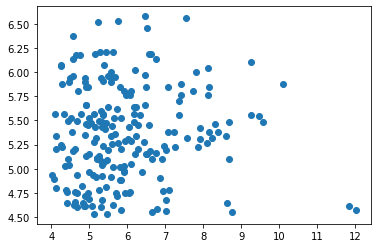

In [152]:
plt.scatter(df['mass'],df['ratio'])

In [134]:
#scaler = MinMaxScaler()
#scaler.fit(df[['output_speed']])
#df['output_speed'] = scaler.transform(df[['output_speed']])
#df.head()

In [135]:
#scaler = MinMaxScaler()
#scaler.fit(df[['functional']])
#df['functional'] = scaler.transform(df[['functional']])
#df.head()

In [161]:
k_rng=range(1,20)
sse =[]
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['mass', 'ratio', 'functional']])
    sse.append(km.inertia_)

In [162]:
sse

[453.37283833067,
 192.27546602643812,
 124.4724373470221,
 98.40216552221946,
 77.968621265604,
 61.639003483541245,
 51.31107742721192,
 42.63838904631586,
 37.57306630941207,
 31.772871337531964,
 28.184580635148862,
 24.35131705070462,
 21.345327776613953,
 19.628980369755404,
 18.282430910242137,
 16.63555483898796,
 15.40326262558194,
 14.622808902318894,
 13.40986517316801]

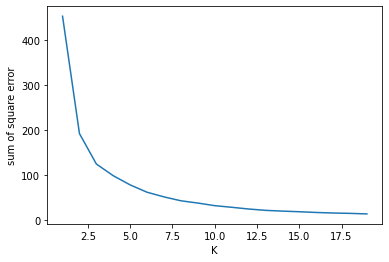

In [163]:
plt.xlabel('K')
plt.ylabel('sum of square error')
plt.plot(k_rng, sse)

In [164]:
km=KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['mass','ratio', 'functional']])
y_predicted

array([1, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0,
       0, 2, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 2,
       2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 2, 1, 1, 2, 2,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 2, 1, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0,
       1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [165]:
df['cluster']=y_predicted
df

,Unnamed: 0,Reductor,output_speed,functional,mass,motor,ratio,cluster
0,0,1,612.000000,0.520722,5.207216,Engine 1,5.100000,1
1,1,2,573.750000,0.711073,7.110730,Engine 1,4.781250,0
2,2,3,570.000000,0.497380,4.973798,Engine 1,4.750000,1
3,3,4,618.750000,0.650535,6.505351,Engine 1,5.156250,0
4,4,5,623.333333,0.701134,7.011342,Engine 1,5.194444,0
...,...,...,...,...,...,...,...,...
207,207,208,601.666667,0.505529,5.055295,Engine 3,5.469697,1
208,208,209,653.125000,0.531984,5.319842,Engine 3,5.937500,1
209,209,210,610.923077,0.535231,5.352311,Engine 3,5.553846,1
210,210,211,559.821429,0.547006,5.470062,Engine 3,5.089286,1


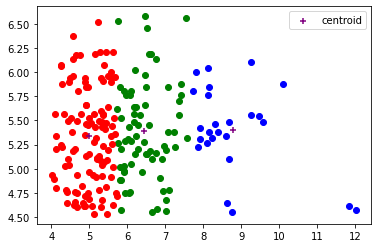

In [166]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.mass, df1['ratio'], color = 'green')
plt.scatter(df2.mass, df2.ratio, color = 'red')
plt.scatter(df3.mass, df3.ratio, color = 'blue')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color = 'purple', marker = '+', label='centroid')
plt.legend()

In [127]:
df['mass'].max()

12.02420880275439